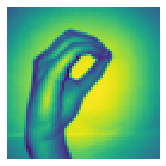

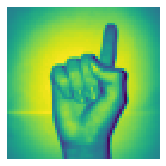

Cost at 250. iteration : 0.271172
Cost at 500. iteration : 0.307101
Cost at 750. iteration : 0.134905
Cost at 1000. iteration : 0.102797
Cost at 1250. iteration : 0.082084
Cost at 1500. iteration : 0.064933
Cost at 1750. iteration : 0.050538
Cost at 2000. iteration : 0.039789
Cost at 2250. iteration : 0.032959
Cost at 2500. iteration : 0.028539
Cost at 2750. iteration : 0.025193
Cost at 3000. iteration : 0.022542
Cost at 3250. iteration : 0.020385
Cost at 3500. iteration : 0.018597
Cost at 3750. iteration : 0.017091
Cost at 4000. iteration : 0.015806
Cost at 4250. iteration : 0.014697
Cost at 4500. iteration : 0.013731
Cost at 4750. iteration : 0.012882


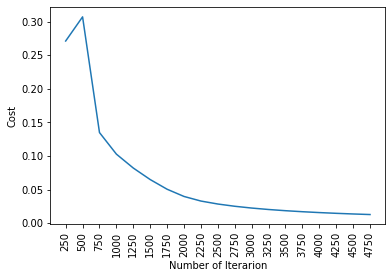

Test Accuracy: 95.16129032258064 %


In [6]:
 """
Author: Göktuğ Yıldırım
Description: The perceptron distinguishes the photo is zero or one.
"""

import numpy as np #linear algebra
from sklearn.model_selection import train_test_split
import pandas as pd #data processing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Datalarda 2062 görsel var. 0'dan 9'a sayılar.
#204-408 zero 205 adet
#822-1027 one 206 adet


#load data set
x_l = np.load("X.npy")
y_ = np.load("Y.npy")

img_size=64
plt.subplot(121)
plt.imshow(x_l[250].reshape(img_size, img_size))
plt.axis("off")
plt.show()

plt.subplot(122)
plt.imshow(x_l[850].reshape(img_size, img_size))
plt.axis("off")
plt.show()

#Data Processing
X = np.concatenate( (x_l[204:409], x_l[822:1027] ), axis=0 )
z = np.zeros(205) # yatay matrix
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1) #reshape() methoduyla her zaman yeni array üretilir.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train_X = X_train.shape[0]
number_of_test_X = X_test.shape[0]
number_of_train_Y = Y_train.shape[0]
number_of_test_Y = Y_test.shape[0]

x_train= X_train.reshape( number_of_train_X , X_train.shape[1]*X_train.shape[2] )
x_test= X_test .reshape( number_of_test_X , X_test.shape[1]*X_test.shape[2] )
y_train = Y_train
y_test = Y_test

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(4096,3) * 0.1,
                  "bias1": np.zeros((1,3)),
                  "weight2": np.random.randn(3,1) * 0.1,
                  "bias2": np.zeros((1,1))}
    return parameters

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(x_train,parameters["weight1"]) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1,parameters["weight2"]) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

def compute_cost_NN(A2, y_train, parameters): #parameters kullanılmadı
    logprobs = np.multiply(np.log(A2),y_train)
    #print("Loss shape: | " + str(logprobs.shape))
    cost = -np.sum(logprobs)/y_train.shape[0]
    #print("Cost shape: | " + str(cost.shape))
    return cost

# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    #print("dz2 shape: | "+str(dZ2.shape))
    
    dW2 = np.dot(cache["A1"].T,dZ2)/X.shape[0]
    #print("dW2 shape: | "+str(dW2.shape))
    
    db2 = np.sum(dZ2,axis =0,keepdims=True)/X.shape[0] #axis=0 1x1 axis=1 348x1
    #print("db2 shape: | "+str(db2.shape))
    
    dZ1 = np.dot(dZ2,parameters["weight2"].T)*(1 - np.power(cache["A1"], 2))
    #print("dz1 shape: | "+str(dZ1.shape))
   
    dW1 = np.dot(X.T,dZ1)/X.shape[0]
    #print("dW1 shape: | "+str(dW1.shape))
    
    db1 = np.sum(dZ1,axis =0,keepdims=True)/X.shape[0]
    #print("db1 shape: | "+str(db1.shape))
    
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

# update parameters
def update_parameters_NN(parameters, grads, learning_rate):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    
    Y_prediction = np.zeros((A2.shape[0],1))
    
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[0]):
        if A2[i,0]<= 0.5:
            Y_prediction[i,0] = 0
        else:
            Y_prediction[i,0] = 1
            
    #print("Gerçek sonuçlar: " + str(y_test.T))
    #print("\n\nTahminler"+ str(A2.T))
    #print("\n\nTahminler with threshold "+ str(Y_prediction.T))

    return Y_prediction
    


def ANN(x_train, y_train,x_test,y_test, num_iterations, learning_rate):
    
    cost_list = []
    index_list = []
    
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    #print("X train: "+str(x_train.shape)+ " | Y train: "+str(y_train.shape)+ " | Weight1: "+ str(parameters["weight1"].shape)+ " | Bias1: "+ str(parameters["bias1"].shape)+ " | Weight2: "+ str(parameters["weight2"].shape)+ " | Bias2: "+ str(parameters["bias2"].shape))
    
    for i in range(num_iterations):
    
        A2, cache = forward_propagation_NN(x_train, parameters)
        
    
        cost = compute_cost_NN(cache["A2"], y_train, parameters)
        
        grads = backward_propagation_NN(parameters, cache, x_train , y_train)
    
        parameters = update_parameters_NN(parameters, grads, learning_rate)
       
        if i % 250 == 0 and i!=0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost at %i. iteration : %f" %(i, cost))
    
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    y_prediction_test = predict_NN(parameters,x_test)
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    
#MAIN
ANN(x_train, y_train,x_test,y_test, 5000, 0.01)
